<a href="https://colab.research.google.com/github/jeraldflowers/decision-tree-and-random-forest-fundamentals/blob/main/random_forest_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest with scikit-learn

In [1]:
#Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We will use the dataset **Pima indians diabetes** of Kaggle: https://www.kaggle.com/datasets/kumargh/pimaindiansdiabetescsv

In [3]:
#Load the dataset to use
df_diabetes = pd.read_csv("/content/pima-indians-diabetes.csv", sep=",")

## Data Exploratory

In [4]:
#Visualization of dataframe
df_diabetes.sample(10)

,6,148,72,35,0,33.6,0.627,50,1
217,5,85,74,22,0,29.0,1.224,32,1
91,7,81,78,40,48,46.7,0.261,42,0
114,4,146,92,0,0,31.2,0.539,61,1
55,7,187,68,39,304,37.7,0.254,41,1
674,6,195,70,0,0,30.9,0.328,31,1
671,10,68,106,23,49,35.5,0.285,47,0
330,2,87,58,16,52,32.7,0.166,25,0
675,9,156,86,0,0,24.8,0.230,53,1
626,0,132,78,0,0,32.4,0.393,21,0
126,1,118,58,36,94,33.3,0.261,23,0


In [5]:
#Rename the columns
df_diabetes.columns = ['1. Number of times pregnant', '2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test', '3. Diastolic blood pressure (mm Hg)', '4. Triceps skin fold thickness (mm)', '5. 2-Hour serum insulin (mu U/ml)', '6. Body mass index (weight in kg/(height in m)^2)', '7. Diabetes pedigree function', '8. Age (years)', '9. Class variable (0 or 1)']

In [6]:
#Let's verify the data
df_diabetes.head()

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In this dataset there is 8 input features and 1 output feature / target. 

The meaning of the feature names is the next:

* Number of times pregnant. 
* Plasma glucose concentration a 2 hours in an oral glucose tolerance test. 
* Diastolic blood pressure (mm Hg)
* Triceps skin fold thickness (mm)   
* 2-Hour serum insulin (mu U/ml)      
* Body mass index (weight in kg/(height in m)^2)   
* Diabetes pedigree function  
* Age (years).
* Class variables (0 or 1).

In [8]:
#Let's analize the shape of the target
print(df_diabetes.shape)

(767, 9)


In [9]:
#Let's visualize the types of the data
df_diabetes.dtypes

1. Number of times pregnant                                                      int64
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test      int64
3. Diastolic blood pressure (mm Hg)                                              int64
4. Triceps skin fold thickness (mm)                                              int64
5. 2-Hour serum insulin (mu U/ml)                                                int64
6. Body mass index (weight in kg/(height in m)^2)                              float64
7. Diabetes pedigree function                                                  float64
8. Age (years)                                                                   int64
9. Class variable (0 or 1)                                                       int64
dtype: object

## Random Forest Training with scikit-learn

In [10]:
#Let's separate in X and y
X = df_diabetes.drop("9. Class variable (0 or 1)", axis=1)
y = df_diabetes["9. Class variable (0 or 1)"]

In [11]:
#Import the necessary libraries to the creation of the model
from sklearn.model_selection import train_test_split

#30% to test y 70% to train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=00000)

In [12]:
#Decision tree
from sklearn.ensemble import RandomForestClassifier

#Creation of the  model
random_forest = RandomForestClassifier(n_estimators=10, random_state=00000)

In [13]:
#Training
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [14]:
#Calculation of the predictions in Train and Test 
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

## Model Test

In [15]:
#Calculation of the metrics 
from sklearn.metrics import accuracy_score

#Calculation accuracy in Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculation accuracy in Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print("The accuracy in train is:", train_accuracy)
print("The accuracy in test is:", test_accuracy)

The accuracy in train is: 0.9850746268656716
The accuracy in test is: 0.7445887445887446


In [16]:
#Let's verify the feature importances
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": random_forest.feature_importances_}
).sort_values("importance", ascending=False)

# Show
feature_importances_df

,feature,importance
1,2. Plasma glucose concentration a 2 hours in a...,0.205740
5,6. Body mass index (weight in kg/(height in m)^2),0.193899
7,8. Age (years),0.129633
6,7. Diabetes pedigree function,0.126973
0,1. Number of times pregnant,0.096289
2,3. Diastolic blood pressure (mm Hg),0.086302
3,4. Triceps skin fold thickness (mm),0.081293
4,5. 2-Hour serum insulin (mu U/ml),0.079870


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test'),
  Text(1, 0, '6. Body mass index (weight in kg/(height in m)^2)'),
  Text(2, 0, '8. Age (years)'),
  Text(3, 0, '7. Diabetes pedigree function'),
  Text(4, 0, '1. Number of times pregnant'),
  Text(5, 0, '3. Diastolic blood pressure (mm Hg)'),
  Text(6, 0, '4. Triceps skin fold thickness (mm)'),
  Text(7, 0, '5. 2-Hour serum insulin (mu U/ml)')])

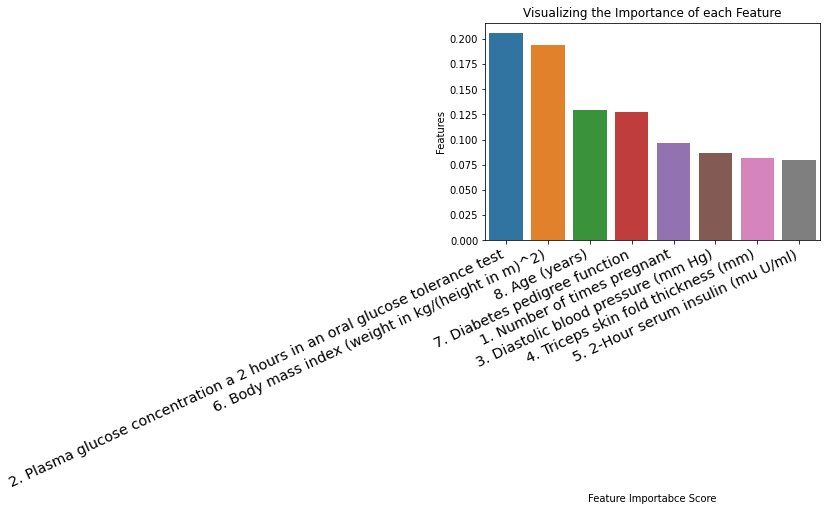

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=feature_importances_df.feature, y = feature_importances_df.importance)
plt.xlabel("Feature Importabce Score")
plt.ylabel("Features")
plt.title("Visualizing the Importance of each Feature")
plt.xticks(rotation=25, horizontalalignment="right", fontweight="light",  fontsize="x-large")